In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import minimize
from sklearn.datasets import make_blobs
plt.rcParams["figure.figsize"] = (4, 3)
np.seterr(all='ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

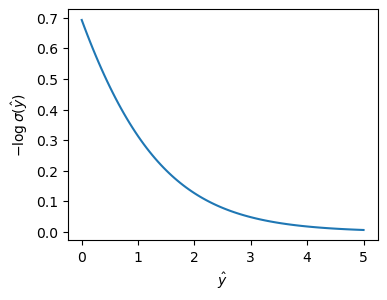

In [2]:
z = np.linspace(0, 5, 101)
plt.plot(z, -np.log(1/(1 + np.exp(-z)))) 
labs = plt.gca().set(xlabel = r"$\hat{y}$", ylabel = r"$-\log \sigma(\hat{y})$")

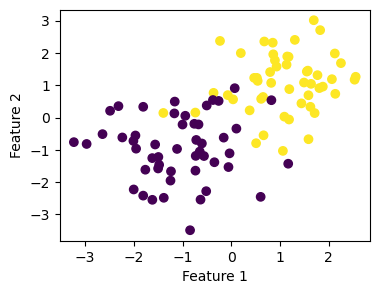

In [3]:
#| fig-cap: Note that this data is **not** linearly separable. The perceptron algorithm wouldn't even have converged for this data set, but logistic regression will do great. 

p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [4]:
# add a constant feature to the feature matrix
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)

Now we'll define some functions to compute the empirical risk: 

In [9]:
# implement: (WE ARE CODING TOGETHER HERE!!)
# - predict
# - sigmoid
# - logistic_loss
# - empirical_risk

def predict(X, w):
    return X@w

def logistic_loss(y_hat, y):
    return -y*np.log(sigmoid(y_hat)) - (1-y)*np.log(1 - sigmoid(y_hat))

def sigmoid(y_hat): 
    return 1 / (1 + np.exp(-y_hat))

def empirical_risk(X, y, w, loss):
    y_hat = predict(X, w)
    return loss(y_hat, y).mean()


Finally, we can write the function that will solve the empirical risk minimization problem for us. We're going to use the `scipy.optimize.minimize` function, which is a built-in function for solving minimization problems. Soon, we'll study how to solve minimization problems from scratch. 

The `scipy.optimize.minimize` function requires us to pass it a single function that accepts a vector of parameters, plus an initial guess for the parameters. 

In [10]:
#| code-fold: false
def find_pars(X, y):
    
    p = X.shape[1]
    w0 = np.random.rand(p) # random initial guess
    
    # perform the minimization
    result = minimize(lambda w: empirical_risk(X, y, w, logistic_loss), 
                      x0 = w0) 
    
    # return the parameters
    return result.x

Ok, let's try it and take a look at the parameters we obtained. Because the final column of `X_` is the constant column of 1s, the final entry of `w` is interpretable as the intercept term `b`. 

In [11]:
#| code-fold: false

w = find_pars(X_, y)
w

array([ 2.13023501,  1.71745945, -0.15021883])

And, finally, we can plot the linear classifier that we learned. 

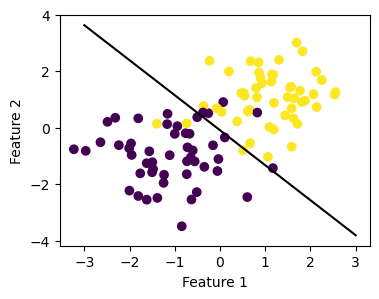

In [12]:
#| code-fold: false

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

f1 = np.linspace(-3, 3, 101)

plt.plot(f1, (w[2] - f1*w[0])/w[1], color = "black")

Since the logistic loss is convex, we are guaranteed that this solution is the unique best solution (as measured by the logistic loss). There is no other possible set of parameters that would lead to a better result (again, as measured by the logistic loss). 